In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Create a model that classifies whether someone will default on their loan
**Dataset is from lending club, modified by Pierian Data**


In [2]:
df = pd.read_csv('DATA/lending_club_loan_two.csv')

In [3]:
df.info() #Line 12, loan_status is the label
          #Also, most features are objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

<AxesSubplot:xlabel='loan_status', ylabel='count'>

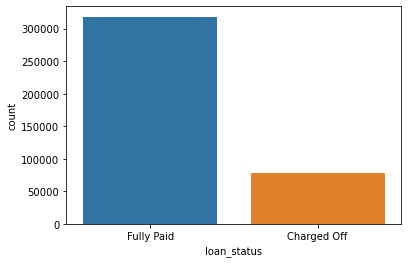

In [4]:
sns.countplot(x='loan_status',data=df) #Uneven 

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

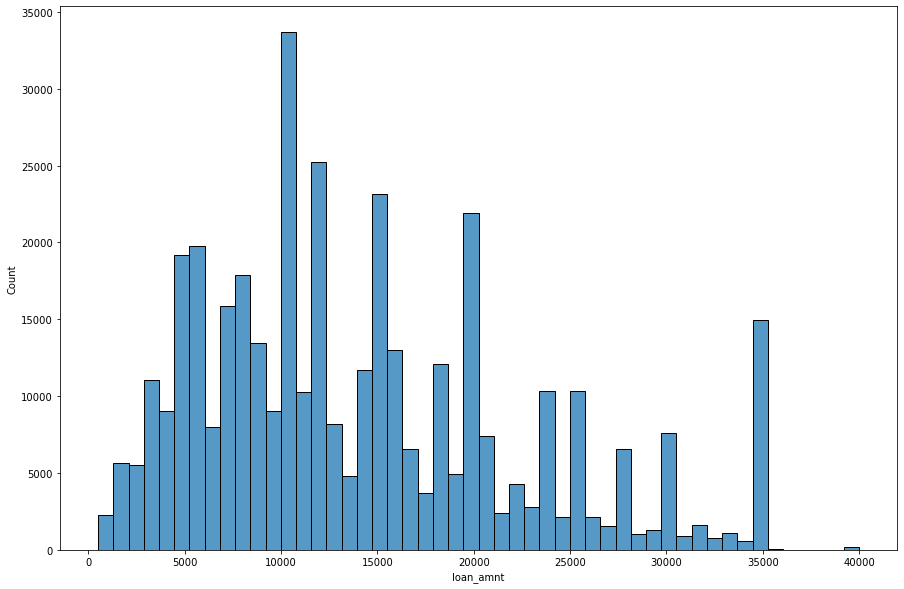

In [5]:
plt.figure(figsize=(15,10))
sns.histplot(x='loan_amnt',data=df,bins=50)

<AxesSubplot:xlabel='loan_amnt'>

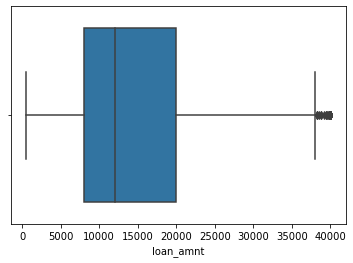

In [6]:
sns.boxplot(x='loan_amnt',data=df) #What is the typical range for the loan amount

In [7]:
df.head() #Which features are we going to work with...

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


<AxesSubplot:>

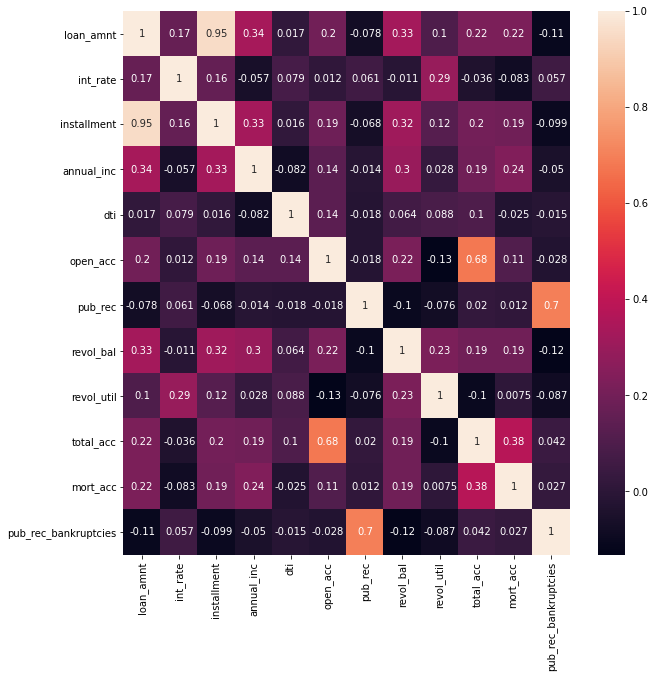

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

**Correlation That Interest Me**:

total_acc & mort_acc (total # of credit lines in borrower's credit file & # of mortgage accounts),
loan_amnt & intallment (''    '' & monthly payment owed by borrower),

<AxesSubplot:xlabel='total_acc', ylabel='mort_acc'>

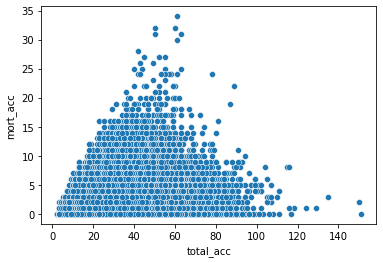

In [9]:
sns.scatterplot(x='total_acc',y='mort_acc',data=df)

In [10]:
df['term'] = df['term'].apply(lambda x: int(x[:3])) #Create a column of integers for whether loan was 36/60 months

<AxesSubplot:xlabel='loan_amnt', ylabel='installment'>

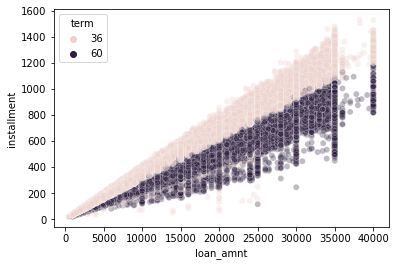

In [11]:
sns.scatterplot(x='loan_amnt',y='installment',data=df,hue='term',alpha=0.3) #Correlation and hue check out, seem obvious

In [12]:
df.corr()['loan_amnt'].sort_values() #Correlation makes sense

pub_rec_bankruptcies   -0.106539
pub_rec                -0.077779
dti                     0.016636
revol_util              0.099911
int_rate                0.168921
open_acc                0.198556
mort_acc                0.222315
total_acc               0.223886
revol_bal               0.328320
annual_inc              0.336887
term                    0.393862
installment             0.953929
loan_amnt               1.000000
Name: loan_amnt, dtype: float64

<AxesSubplot:>

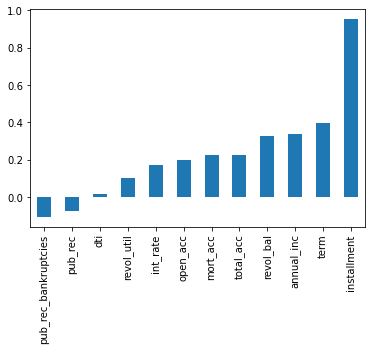

In [13]:
df.corr()['loan_amnt'].sort_values()[:-1].plot(kind='bar') #bar plot of numerical correlation with loan_amnt

In [14]:
#df['loan_status'].value_counts()
df['loan_repaid'] = pd.get_dummies(df['loan_status'],drop_first=True)

In [15]:
df.corr()['loan_repaid'].sort_values() #Which features matter more?

int_rate               -0.247758
term                   -0.173246
revol_util             -0.082373
dti                    -0.062413
loan_amnt              -0.059836
installment            -0.041082
open_acc               -0.028012
pub_rec                -0.019933
pub_rec_bankruptcies   -0.009383
revol_bal               0.010892
total_acc               0.017893
annual_inc              0.053432
mort_acc                0.073111
loan_repaid             1.000000
Name: loan_repaid, dtype: float64

<AxesSubplot:>

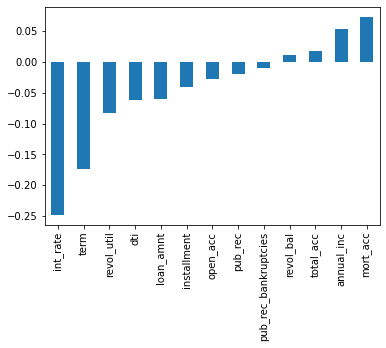

In [16]:
df.corr()['loan_repaid'][:-1].sort_values().plot(kind='bar') #barplot of correlation btwn numerical feats and loan_repaid

In [17]:
df.groupby('loan_status')['loan_amnt'].describe() #Stats on loan_amnt based on loan_status

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


<AxesSubplot:xlabel='grade', ylabel='count'>

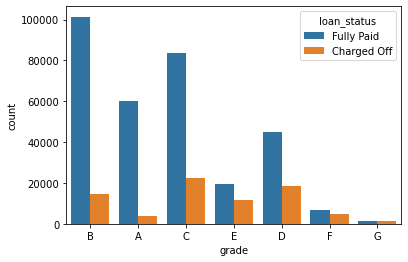

In [18]:
sns.countplot(x='grade',hue='loan_status', data=df) #Comparing defaulted loans by grade

In [19]:
subgrades = sorted(list(df['sub_grade'].unique())) #Sorted list of subgrades for above countplot

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

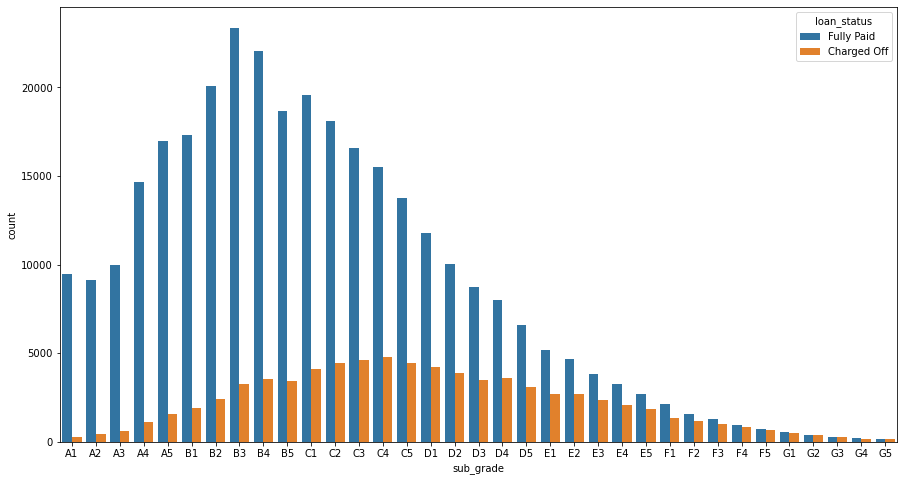

In [20]:
plt.figure(figsize=(15,8))
sns.countplot(x='sub_grade',hue='loan_status', data=df, order=subgrades) #Comparing defaulted loans by grade

In [21]:
100 * df.isnull().sum()/len(df) #missing data as a percentage of feature

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [22]:
#Focusing on emp_title
df['emp_title'].nunique() #17k+ unique job titles, way too many to make dummy variables

173105

In [23]:
df['emp_title'].value_counts() #Sorry person who works at long island jewish hospital

Teacher                            4389
Manager                            4250
Registered Nurse                   1856
RN                                 1846
Supervisor                         1830
                                   ... 
University Retirement Community       1
Sales & Service Supervisor            1
Orchard View Schools                  1
Imagery Analyst                       1
Francis hospital                      1
Name: emp_title, Length: 173105, dtype: int64

In [24]:
df.drop('emp_title',axis=1,inplace=True) #Get rid of employment title section

In [25]:
#Focusing on emp_length
df['emp_length'].nunique() #11 unique employment lengths

11

In [26]:
lengths = list(df['emp_length'].unique())
lengths

['10+ years',
 '4 years',
 '< 1 year',
 '6 years',
 '9 years',
 '2 years',
 '3 years',
 '8 years',
 '7 years',
 '5 years',
 '1 year',
 nan]

In [27]:
lengths.pop()
lengths = sorted(lengths)

In [28]:
sort_emp_lengths = ['< 1 year',
                    '1 year',
                    '2 years', 
                    '3 years', 
                    '4 years', 
                    '5 years', 
                    '6 years', 
                    '7 years', 
                    '8 years', 
                    '9 years', 
                    '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

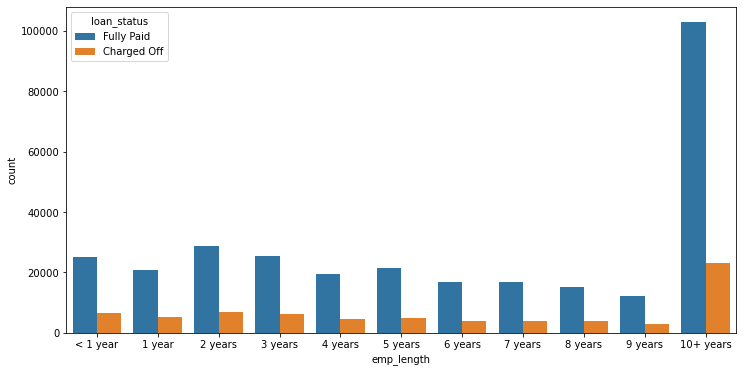

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length',data=df, hue='loan_status',order=sort_emp_lengths)

In [30]:
df.drop('emp_length',axis=1, inplace=True) #emp_lengths and loan status seems relatively uniform

In [31]:
df.isnull().sum() #Which features still have missing data

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [32]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [33]:
df['purpose'].head(10) #Title and purpose seems somewhat redundant

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [34]:
df.drop('title',axis=1,inplace=True)

In [35]:
df.isnull().sum() #Which features still have missing data

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [36]:
df['mort_acc'].value_counts() #mort_acc = number of mortage accounts

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
31.0         2
26.0         2
32.0         2
28.0         1
34.0         1
30.0         1
Name: mort_acc, dtype: int64

In [37]:
df.corr()['mort_acc'].sort_values() #Makes sense, total acc and mort acc are the highest correlated

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
term                    0.096220
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [38]:
total_mort_ave = df.groupby('total_acc').mean()['mort_acc'] #Mean mort_acc value by total_acc

In [39]:
def fill_mort(total, mort):
    '''Take in total_acc and mort_acc, if mort_acc is null, fill it with the mean mort_acc value by total_acc'''
    
    if np.isnan(mort):
        return total_mort_ave[total]
    else:
        return mort

In [40]:
df['mort_acc'] = df.apply(lambda x: fill_mort(x['total_acc'],x['mort_acc']),axis=1)

In [41]:
100* df.isnull().sum()/len(df) #Drop revol_util, pub_rec_bankruptcies

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [42]:
df.drop('revol_util',axis=1,inplace=True)
df.drop('pub_rec_bankruptcies',axis=1,inplace=True)

In [43]:
df.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
earliest_cr_line       0
open_acc               0
pub_rec                0
revol_bal              0
total_acc              0
initial_list_status    0
application_type       0
mort_acc               0
address                0
loan_repaid            0
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            396030 non-null  float64
 1   term                 396030 non-null  int64  
 2   int_rate             396030 non-null  float64
 3   installment          396030 non-null  float64
 4   grade                396030 non-null  object 
 5   sub_grade            396030 non-null  object 
 6   home_ownership       396030 non-null  object 
 7   annual_inc           396030 non-null  float64
 8   verification_status  396030 non-null  object 
 9   issue_d              396030 non-null  object 
 10  loan_status          396030 non-null  object 
 11  purpose              396030 non-null  object 
 12  dti                  396030 non-null  float64
 13  earliest_cr_line     396030 non-null  object 
 14  open_acc             396030 non-null  float64
 15  pub_rec          

In [45]:
df.columns.to_series().groupby(df.dtypes).describe()

,count,unique,top,freq
uint8,1,1,loan_repaid,1
int64,1,1,term,1
float64,10,10,revol_bal,1
object,11,11,grade,1


In [46]:
df.drop('grade',axis=1,inplace=True) #Drop grade, focus on subgrade

In [47]:
sub_grade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True) #Get dummies of the subgrade column

In [48]:
df = pd.concat([df.drop('sub_grade',axis=1),sub_grade_dummies],axis=1)

In [49]:
object_dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']],drop_first=True)

In [50]:
df = pd.concat([df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1),object_dummies],axis=1)

In [51]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

In [52]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [53]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [54]:
home_dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = pd.concat([df.drop('home_ownership',axis=1),home_dummies],axis=1)

In [55]:
df.columns #Focus on address column, extract zip code

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'mort_acc', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT'],
      dtype='object')

In [56]:
df['address'][0].split()[-1] #Extract the zipcode

'22690'

In [57]:
df['zipcode'] = df['address'].apply(lambda address: address.split()[-1])

In [58]:
zip_dummies = pd.get_dummies(df['zipcode'],drop_first=True)

In [59]:
df = pd.concat([df.drop(['address','zipcode'],axis=1),zip_dummies],axis=1)

In [60]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'mort_acc', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',
       '11650', '22690', '2

In [61]:
df.drop('issue_d',axis=1,inplace=True) #Drop issue_d, it is technically data leakage for this specific model.

In [62]:
df.select_dtypes(['object']).columns #Convert earliest_cr_line to year int, drop loan_status

Index(['loan_status', 'earliest_cr_line'], dtype='object')

In [63]:
int(df['earliest_cr_line'][0].split('-')[1]) #Extract year from earliest_cr_line

1990

In [64]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date: int(date.split('-')[1])) #Replace earliest_cr_line with the year in a new column

In [65]:
df.drop('earliest_cr_line',axis=1,inplace=True) #drop earliest_cr_line

In [66]:
df.drop('loan_status',axis=1,inplace=True) #drop loan_status, we already have loan_repaid: 0 or 1

In [67]:
df.info() #Ready to train test split

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 77 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   term                                 396030 non-null  int64  
 2   int_rate                             396030 non-null  float64
 3   installment                          396030 non-null  float64
 4   annual_inc                           396030 non-null  float64
 5   dti                                  396030 non-null  float64
 6   open_acc                             396030 non-null  float64
 7   pub_rec                              396030 non-null  float64
 8   revol_bal                            396030 non-null  float64
 9   total_acc                            396030 non-null  float64
 10  mort_acc                             396030 non-null  float64
 11  loan_repaid  

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X = df.drop('loan_repaid',axis=1).values #Preparing the data for train test split
y = df['loan_repaid'].values #calling just the .values so tf doesn't get a pd.Series or DF

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101) #Split data

In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) #Scale AND fit data to x_train
X_test = scaler.transform(X_test) #Scale data X_test

In [73]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [86]:
model = Sequential()

model.add(Dense(100,activation='relu')) #input layer
model.add(Dropout(0.2))#Between 0.2-0.5 to randomly turn off 20-50% of neurons during training so their weights and biases aren't being updated

model.add(Dense(50,activation='relu')) #hidden layer
model.add(Dropout(0.2))

model.add(Dense(25,activation='relu')) #hidden layer
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid')) #output layer, sigmoid for classifying loan_repaid 0 or 1

model.compile(loss='binary_crossentropy',optimizer='adam')

In [83]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss',mode='min',verbose=1,patience=25) #early stop callback

In [88]:
model.fit(x=X_train,y=y_train,epochs=25,
          batch_size=256,
          validation_data=(X_test,y_test), #validation data
          callbacks=[early_stop]) #early stop callback

Epoch 1/25
1238/1238 [==============================] - 3s 3ms/step - loss: 0.2942 - val_loss: 0.2617
Epoch 2/25
1238/1238 [==============================] - 3s 2ms/step - loss: 0.2654 - val_loss: 0.2601
Epoch 3/25
1238/1238 [==============================] - 3s 3ms/step - loss: 0.2630 - val_loss: 0.2598
Epoch 4/25
1238/1238 [==============================] - 3s 3ms/step - loss: 0.2622 - val_loss: 0.2596
Epoch 5/25
1238/1238 [==============================] - 3s 2ms/step - loss: 0.2614 - val_loss: 0.2589
Epoch 6/25
1238/1238 [==============================] - 3s 3ms/step - loss: 0.2608 - val_loss: 0.2594
Epoch 7/25
1238/1238 [==============================] - 3s 2ms/step - loss: 0.2603 - val_loss: 0.2592
Epoch 8/25
1238/1238 [==============================] - 3s 3ms/step - loss: 0.2602 - val_loss: 0.2589
Epoch 9/25
1238/1238 [==============================] - 3s 3ms/step - loss: 0.2600 - val_loss: 0.2589
Epoch 10/25
1238/1238 [==============================] - 3s 2ms/step - loss: 0.259

<AxesSubplot:>

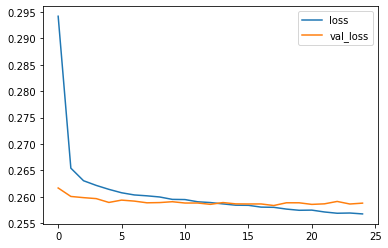

In [89]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [90]:
from sklearn.metrics import classification_report,confusion_matrix

In [94]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [96]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions)) #Not bad performance, could be improved obviously

[[ 6749  8744]
 [   44 63669]]


              precision    recall  f1-score   support

           0       0.99      0.44      0.61     15493
           1       0.88      1.00      0.94     63713

    accuracy                           0.89     79206
   macro avg       0.94      0.72      0.77     79206
weighted avg       0.90      0.89      0.87     79206



# Predict whether someone will repay their loan using model

In [97]:
import random
random_index = random.randint(0,len(df))

rand_cust = df.drop('loan_repaid',axis=1).iloc[random_index]
rand_cust

loan_amnt           15000.00
term                   36.00
int_rate                6.54
installment           290.58
annual_inc          72000.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1994.00
Name: 158014, Length: 76, dtype: float64

In [98]:
rand_cust.values.reshape(1,76)

array([[1.50000000e+04, 3.60000000e+01, 6.54000000e+00, 2.90580000e+02,
        7.20000000e+04, 6.17000000e+00, 5.00000000e+00, 0.00000000e+00,
        1.19220000e+04, 1.00000000e+01, 4.29158423e-01, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [99]:
random_customer = scaler.transform(rand_cust.values.reshape(1,76)) #scale and reshape data to pass it into the model

In [100]:
model.predict(random_customer) #predict loan_repaid off of other data using model

array([[1.]], dtype=float32)

In [102]:
df.iloc[random_index]['loan_repaid'] #Model accurately predicted that this person would pay back their loan

1.0